<a href="https://colab.research.google.com/github/rasith1998/Sentiment-Analysis-on-selected-Dialog-s-Apps-/blob/main/Dialog_Data_sets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 1.1 MB/s 


In [10]:
!pip install watermark

In [13]:
%matplotlib inline
%load_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper
#%watermark --machine --python --packages numpy,pandas,scikit-learn

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

pandas             : 1.3.5
matplotlib         : 3.2.2
seaborn            : 0.11.2
google_play_scraper: 1.0.3



In [14]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

### Scraping App Information
Let's scrape the info for each app:

In [15]:
app_packages = [
  'net.omobio.dialogsc',#MyDialog
  'net.omobio.dialog.dialogra',#Dialog Retail Hub
  'lk.dialog.hometalk' #Dialog HomeTalk
]

In [16]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='lk')
  del info['comments']
  app_infos.append(info)

100%|██████████| 3/3 [00:00<00:00,  3.74it/s]


In [17]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [27]:
print_json(app_infos)

[
  {
    "adSupported": true,
    "androidVersion": "5.0",
    "androidVersionText": "5.0 and up",
    "appId": "net.omobio.dialogsc",
    "containsAds": true,
    "contentRating": "Rated for 3+",
    "contentRatingDescription": null,
    "currency": "LKR",
    "description": "The MyDialog App is a new and revolutionary way for you to manage all your Dialog connections instantly from anywhere, anytime at your fingertips.\r\n \r\n\u2219 Secure all your Dialog connections\r\nThe My Dialog App takes your online security to the next level by placing all your Dialog connections under your NIC.\r\n \r\n\u2219 Keep an eye on your usage\r\nMy Dialog lets you know your usage exactly, whether it be your calls, SMS, or data.\r\n \r\n\u2219 Pay your bills with ease\r\nWhy waste time heading to a payment center? My Dialog lets you reload and make bill payments in just a few simple clicks!\r\n \r\n\u2219 Make faster payments\r\nSave your petty cash. Enter your Visa/Master card into the My Dialog ap

In [20]:
import urllib
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

FileNotFoundError: ignored

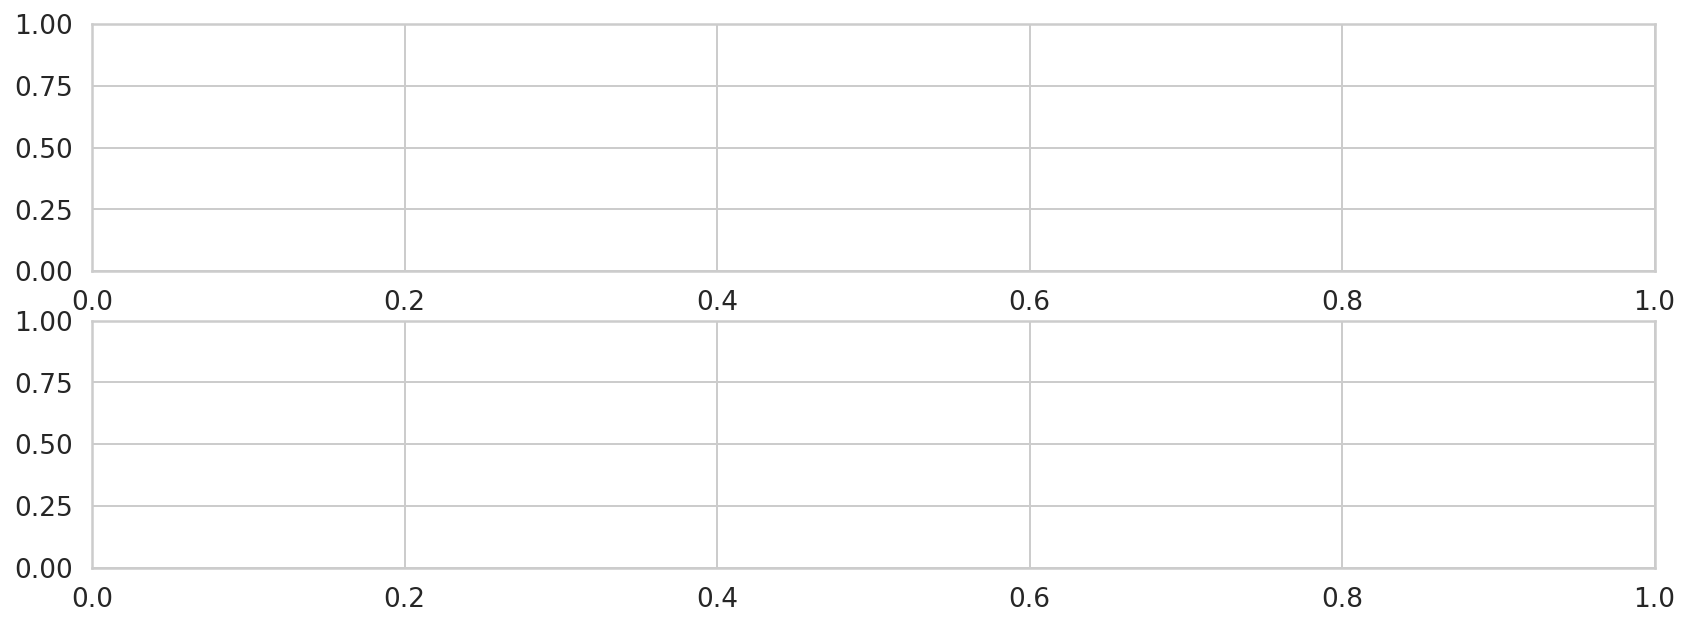

In [22]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  #f = urllib.request.urlopen(ai['icon'])
  img = plt.imread(ai['icon'],0)
  #img = mpimg.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

# Read Images 
#img = mpimg.imread('C:/Users/alvar/Desktop/IE/1 - Full-time/Term 2/Machine Learning 2/Assigments/Group/For sunday/Tanzania.png') 

# Output Images 
#plt.imshow(img)


In [23]:

# from skimage import io
# import matplotlib.pyplot as plt
# url1 = 'https://play-lh.googleusercontent.com/9uy9IoCetw4PQMpY5bBOdnFjK2pBNFH-cEUNGBJSVElqAQh6_gscat25hRw20A_5jnc'
# url2 = 'https://play-lh.googleusercontent.com/rhXXvMdZjSBuQvbxxalVlFVGXuIc8wrmGaYhyyB0eSxMz7R6TSERotNwTxEXkewBZ50'
# image1 = io.imread(url1)
# image2 = io.imread(url2)
# plt.imshow(image1)
# plt.imshow(image2)
# plt.show()
# plt.show()

In [24]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [26]:
app_infos_df.shape

(3, 51)

## Scraping App Reviews
In an ideal world, we would get all the reviews. But there are lots of them and we're scraping the data. That wouldn't be very polite. What should we do?

We want:

Balanced dataset - roughly the same number of reviews for each score (1-5)
A representative sample of the reviews for each app
We can satisfy the first requirement by using the scraping package option to filter the review score. For the second, we'll sort the reviews by their helpfulness, which are the reviews that Google Play thinks are most important. Just in case, we'll get a subset from the newest, too:

In [28]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='lk',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 3/3 [00:05<00:00,  1.80s/it]


In [29]:
print_json(app_reviews[0])

{
  "appId": "net.omobio.dialogsc",
  "at": "2022-03-28 13:30:20",
  "content": "This app crashes itself and to say its slows down always. I've wanted to say this for a long time but your connection is the worst it takes a long time to download anything via WiFi. I even play games with it and the ping goes unexpectedly high with no reason please fix this issue as soon as possible or else you may lose many of your valuable customers including me.",
  "repliedAt": "2022-03-28 13:35:41",
  "replyContent": "Hi, Apologies for any inconvenience caused to you. We are continuously improving the speed and the stability of the app, and keep the app always updated with the latest version. If you are facing any data slowness or low signal issues, kindly reach us via the WhatsApp hotline (777678678) to get better assistance.\n\n",
  "reviewCreatedVersion": "15.0.0",
  "reviewId": "gp:AOqpTOFmkeI1XOO07WI0eRg_giDS45Jw9B4i75kpmUHZ0dO6BS7jEndba5PbNRepnfZRDeOqRGsEGjqrOpmY-Q",
  "score": 1,
  "sortOrder"

In [30]:
len(app_reviews)

2040

In [34]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('Dlg_Apps_reviews_ggl.csv', index=None, header=True) # Save review

In [32]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFmkeI1XOO07WI0eRg_giDS45Jw9B4i75kpmUH...,lushitharan,https://play-lh.googleusercontent.com/a-/AOh14...,This app crashes itself and to say its slows d...,1,84,15.0.0,2022-03-28 13:30:20,"Hi, Apologies for any inconvenience caused to ...",2022-03-28 13:35:41,most_relevant,net.omobio.dialogsc
1,gp:AOqpTOEclc0vKFgbr6svyQdhSlcrAkVEfnnpV2IDBXH...,Buddhima Zoysa,https://play-lh.googleusercontent.com/a/AATXAJ...,When I open the app I have to wait about from ...,1,518,14.3.0,2022-01-27 02:24:43,"Hi, Thankyou for your feedback. Our team is cu...",2022-01-27 03:06:02,most_relevant,net.omobio.dialogsc
2,gp:AOqpTOHQKYC6pqA_ACyosBplqa0CjFkc_M5rdSfZ1Hm...,Shahinth Jeewaratnam,https://play-lh.googleusercontent.com/a/AATXAJ...,The App is extremely poor as always. The Previ...,1,1,None,2022-03-05 15:43:35,Hi Shahinth !\n\nPlease share more details of ...,2022-03-05 15:52:16,most_relevant,net.omobio.dialogsc
3,gp:AOqpTOGnCP1DH23IcAQWufUw99m7eZ7k0dsO9OrzVRZ...,Harshana Wijesinghe,https://play-lh.googleusercontent.com/a-/AOh14...,Please change the new UI to the older one or a...,1,335,14.0.1,2021-03-23 09:58:02,"Hi Harshana,\nAs mobile phone technology is co...",2021-03-23 10:19:00,most_relevant,net.omobio.dialogsc
4,gp:AOqpTOEMhrCIitAReGzQUig_z3He1Vvnm-wKmIGbE9o...,Areeba Haroon,https://play-lh.googleusercontent.com/a-/AOh14...,The app is extremely slow. Literally takes 5 m...,1,681,14.1.1,2021-07-15 18:58:54,"Hi Areeba, We are extremely sorry about the un...",2021-07-15 19:34:15,most_relevant,net.omobio.dialogsc


In [33]:
app_reviews_df.shape

(2040, 12)